[![General Assembly Logo](https://camo.githubusercontent.com/1a91b05b8f4d44b5bbfb83abac2b0996d8e26c92/687474703a2f2f692e696d6775722e636f6d2f6b6538555354712e706e67)](https://generalassemb.ly/education/web-development-immersive)
![Misk Logo](https://i.ibb.co/KmXhJbm/Webp-net-resizeimage-1.png)

_By: Maha AlDossary_

# Project-3: Villa prices in Saudi Arabia

---



### Contents:
- [Acknowledgment:](#Acknowledgment:)
- [Data Description](#Data-Description)
- [Problem Statment](#Problem-Statment)
- [Goal](#Goal)
- [Kaggle](#Kaggle-Link)
- [Import Required Packages](#Import-Required-Packages)
- [web scrapping](#web-scrapping)
- [Automated crawling using Selenium - Training data](#Automated-crawling-using-Selenium---Training-data)
- [Extract more features ](#Extract-more-features)
- [Data Cleaning and EDA](#Data-Cleaning-and-EDA)
- [Data Visualization](#Data-Visualization)
- [Test data part](#Test-data-part)

villa.jpg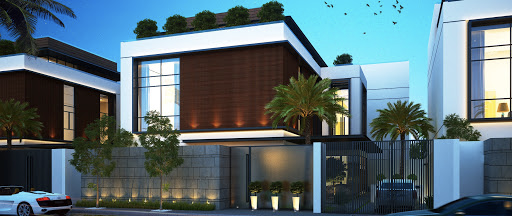

## Acknowledgment:
- This data has been collected from  [property finder website]('https://www.propertyfinder.sa/').
- This data has been collected for educational purposes and not for any other use.

## Data Description

**the "Villa prices in Saudi Arabia" data contain 11 features for each villa that help to predict villa price**


|Feature|Type|Description|
|----|----|----|
|price|float|Villa price|
|neighborhood_name|object|neighborhood name |
|administritive_area|object|Administritive area name|
|city|object|city name where villa|
|rooms	| int       |number of bedrooms in villa	|
|bathrooms	|int|number of bathrooms in villa	|
|sqm|int| sqm	|villa square meter|			
|elevator|int|check if there is elevator or no . 1:there is elevator 0:no elevator |
|pool|int|check if there is pool or no . 1:there is pool 0:no pool |
|driver|int|check if there is driver room or no . 1:there is driver room 0:no driver room|
|garden|int|check if there is garden or no . 1:there is garden 0:no garden |


## Problem Statment
Recently, real estate prices in the Kingdom of Saudi Arabia have witnessed a rise, especially in villa real estate, and because housing is one of the most important living factors, this file helps to predict prices according to each region in Saudi Arabia,and  takes into account the factors affecting the increase in the villa price, such as the city, the neighborhood, and other features within each villa.

## Goal

This project predict Villas prices based on the features of each villa.

## kaggle
**[here Kaggle link for villas price dataset](https://www.kaggle.com/maha48/villas-price-dataset)**

## Import Required Packages

In [150]:
import requests
# import re
import pandas as pd
from bs4 import BeautifulSoup
from time import sleep
from selenium import webdriver

#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

**Request to get data from propertyfinder**

In [2]:
response=requests.get("https://www.propertyfinder.sa/en/buy/villas-for-sale.html?page=1")

In [3]:
response.status_code

200

In [4]:
soup1=BeautifulSoup(response.text, 'html.parser')
soup1

<!DOCTYPE html>

<html><head><script>
      window.dataLayer = [];
      window.loopaData = {};
  </script><meta charset="utf-8"/><title>Villas for sale in Saudi - 2654 Houses for sale | Property Finder Saudi</title><meta content="Search Houses for sale in Saudi with maps &amp; photos on www.propertyfinder.sa✓ Choose from our 2654 Villas✓ Installment Payment Plans available✓ Single Detached &amp; Semi Detached Homes✓" name="description"/><meta content="noindex,follow" name="robots"/><meta content="https://www.propertyfinder.sa/en/buy/villas-for-sale.html?page=1" property="og:url"/><meta content="Villas for sale in Saudi - 2654 Houses for sale | Property Finder Saudi" property="og:title"/><meta content="Search Houses for sale in Saudi with maps &amp; photos on www.propertyfinder.sa✓ Choose from our 2654 Villas✓ Installment Payment Plans available✓ Single Detached &amp; Semi Detached Homes✓" property="og:description"/><link href="/dist/desktop/css/5399e66ed0.en.property-serp.critical.css

In [6]:
items=soup1.find_all('div', attrs={'class':'card-list card-list--property'})
items

[<div class="card-list card-list--property" data-qs="cardlist"><div class="card-list__item"><a class="card card--clickable" href="/en/buy/villa-for-sale-ar-riyadh-east-riyadh-al-munsiyah-152595.html"><div class="card__image card__image--property"><div><picture class="card__img card__img--style1"><source srcset="https://www.propertyfinder.sa/property/1611848687/260/185/MODE/31fccc/152595-6dceao.webp?ctr=sa" type="image/webp"/><source srcset="https://www.propertyfinder.sa/property/1611848687/260/185/MODE/31fccc/152595-6dceao.jpg?ctr=sa" type="image/jpeg"/><img class="card__img card__img--style1" onerror="propertyfinder.progressiveImages.onError(this);" src="https://www.propertyfinder.sa/property/1611848687/260/185/MODE/31fccc/152595-6dceao.jpg?ctr=sa" title="اغتنم الفرصه فيلا للبيع درج داخلي فقط.."/></picture><div class="card-icon-group__image-icons-area"></div></div></div><div class="card__content"><div class="card__header"><div class="card__price-area"><p class="card__price"><span clas

## web scrapping

In [7]:
neighborhood_name=[]
price =[]
city=[]
rooms=[]
bathrooms=[]
sqm=[]
administritive_area=[]
ref=[]
for i in items:
    for r in i:
    
        for j in range(len(r.find_all('div',class_='card__content'))):
            price.append(float(r.find_all('span',class_='card__price-value')[j].text.split()[0].replace(',', '')))
            neighborhood_name.append(r.find_all('span', class_="card__location-text")[j].text.split(',')[0])
            city.append(r.find_all('span', class_="card__location-text")[j].text.split(',')[1])


            try:
                administritive_area.append(r.find_all('span', class_="card__location-text")[j].text.split(',')[2])
            except:
                administritive_area.append("null")


            rooms.append(r.find_all('p', class_="card__property-amenity card__property-amenity--bedrooms")[j].text)        
            try:
                bathrooms.append(r.find_all('p',class_="card__property-amenity--bathrooms")[j].text)
            except:
                bathrooms.append("null")
            try:
                sqm.append(r.find_all('p',class_="card__property-amenity card__property-amenity--area")[j].text.split()[0])
            except:
                sqm.append("null")



In [8]:
df = pd.DataFrame(list(zip(price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm)) ,columns=['price','neighborhood_name','administritive_area','city','rooms','bathrooms','sqm']) 
df.head()

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm
0,1300000.0,Al Munsiyah,Ar Riyadh,East Riyadh,4,5,240
1,2500000.0,Al Murjan,Makkah Al Mukarramah,Jeddah,5,4,309
2,1300000.0,Ar Rimal,Ar Riyadh,East Riyadh,5,5,300
3,1550000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312
4,1000000.0,Ash Shifa,Ar Riyadh,South Riyadh,4,3,300


In [9]:
df.shape

(25, 7)

## Automated crawling using Selenium - Training data

In [10]:
driver = webdriver.Chrome(executable_path='./chromedriver')
for i in range(1,60):
    neighborhood_name=[]
    price =[]
    city=[]
    rooms=[]
    bathrooms=[]
    sqm=[]
    administritive_area=[]
    ref=[]
    driver.get("https://www.propertyfinder.sa/en/buy/villas-for-sale.html?page={}".format(i))

    sleep(5) 
    
    html = driver.page_source 
    
    soup1= BeautifulSoup(html, 'html.parser')
    items= soup1.find_all('div', attrs={'class':'card-list card-list--property'})
    
    
#     -------------- 
    for item in items:
        for lis in item:
            for j in range(len(lis.find_all('span',class_='card__price-value'))):
                price.append(float(lis.find_all('span',class_='card__price-value')[j].text.split()[0].replace(',', '')))
                neighborhood_name.append(lis.find_all('span', class_="card__location-text")[j].text.split(',')[0])
                city.append(lis.find_all('span', class_="card__location-text")[j].text.split(',')[1])


                try:
                    administritive_area.append(lis.find_all('span', class_="card__location-text")[j].text.split(',')[2])
                except:
                    administritive_area.append("null")

                try:
                    rooms.append(lis.find_all('p', class_="card__property-amenity card__property-amenity--bedrooms")[j].text)
                except:
                    rooms.append("null")
                    
                    
                try:
                    bathrooms.append(lis.find_all('p',class_="card__property-amenity--bathrooms")[j].text)
                except:
                    bathrooms.append("null")
                    
                    
                try:
                    sqm.append(lis.find_all('p',class_="card__property-amenity card__property-amenity--area")[j].text.split()[0])
                except:
                    sqm.append("null")
                try:  
                    ref.append(lis.find('a',class_='card card--clickable')['href'])
                except:
                    ref.append("null")
                

    df = pd.DataFrame({'price':price,
                       'neighborhood_name':neighborhood_name,
                       'administritive_area':administritive_area,
                       'city':city,
                       'rooms':rooms,
                       'bathrooms':bathrooms,
                       'sqm':sqm,
                       'ref':ref
                      })

     #Write each page
    df.to_csv('./data/page{}.csv'.format(i), index=False)

    #Write all of the pages
    df.to_csv('./data/all.csv', mode='a' ,index=False, header=False)   
    
    print(f'Page {i} Finished!')

Page 1 Finished!
Page 2 Finished!
Page 3 Finished!
Page 4 Finished!
Page 5 Finished!
Page 6 Finished!
Page 7 Finished!
Page 8 Finished!
Page 9 Finished!
Page 10 Finished!
Page 11 Finished!
Page 12 Finished!
Page 13 Finished!
Page 14 Finished!
Page 15 Finished!
Page 16 Finished!
Page 17 Finished!
Page 18 Finished!
Page 19 Finished!
Page 20 Finished!
Page 21 Finished!
Page 22 Finished!
Page 23 Finished!
Page 24 Finished!
Page 25 Finished!
Page 26 Finished!
Page 27 Finished!
Page 28 Finished!
Page 29 Finished!
Page 30 Finished!
Page 31 Finished!
Page 32 Finished!
Page 33 Finished!
Page 34 Finished!
Page 35 Finished!
Page 36 Finished!
Page 37 Finished!
Page 38 Finished!
Page 39 Finished!
Page 40 Finished!
Page 41 Finished!
Page 42 Finished!
Page 43 Finished!
Page 44 Finished!
Page 45 Finished!
Page 46 Finished!
Page 47 Finished!
Page 48 Finished!
Page 49 Finished!
Page 50 Finished!
Page 51 Finished!
Page 52 Finished!
Page 53 Finished!
Page 54 Finished!
Page 55 Finished!
Page 56 Finished!
P

In [15]:
#read data after scrapping main Features
df1=pd.read_csv('./data/all.csv')
df1.shape

(1475, 8)

In [9]:
df1.head()

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,ref
0,1300000.0,Al Munsiyah,Ar Riyadh,East Riyadh,4,5,240,https://www.propertyfinder.sa/en/buy/villa-for...
1,2500000.0,Al Murjan,Makkah Al Mukarramah,Jeddah,5,4,309,https://www.propertyfinder.sa/en/buy/villa-for...
2,1300000.0,Ar Rimal,Ar Riyadh,East Riyadh,5,5,300,https://www.propertyfinder.sa/en/buy/villa-for...
3,1550000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312,https://www.propertyfinder.sa/en/buy/villa-for...
4,1000000.0,Ash Shifa,Ar Riyadh,South Riyadh,4,3,300,https://www.propertyfinder.sa/en/buy/villa-for...


**Adding more features help to predict villas prices**

In [18]:
# Get Description for each villa
driver = webdriver.Chrome(executable_path='./chromedriver')
des=[]

for ref in df1.ref:

    driver.get(ref)
    
    html = driver.page_source 
    
    soup2= BeautifulSoup(html, 'html.parser')
        
    for description in soup2.find_all('div',class_='text-trim property-description__text-trim'):
        try:
            des.append(description.text.replace('*', ' ').replace('\n',' ').replace('-',' ').replace(':',' ').replace('و',''))
        except:
            des.append('null')
            
    print(f'Page {len(des)} Finished!')



Page 1 Finished!
Page 2 Finished!
Page 3 Finished!
Page 4 Finished!
Page 5 Finished!
Page 6 Finished!
Page 7 Finished!
Page 8 Finished!
Page 9 Finished!
Page 10 Finished!
Page 11 Finished!
Page 12 Finished!
Page 13 Finished!
Page 14 Finished!
Page 15 Finished!
Page 16 Finished!
Page 17 Finished!
Page 18 Finished!
Page 19 Finished!
Page 20 Finished!
Page 21 Finished!
Page 22 Finished!
Page 23 Finished!
Page 24 Finished!
Page 25 Finished!
Page 26 Finished!
Page 27 Finished!
Page 28 Finished!
Page 29 Finished!
Page 30 Finished!
Page 31 Finished!
Page 32 Finished!
Page 33 Finished!
Page 34 Finished!
Page 35 Finished!
Page 36 Finished!
Page 37 Finished!
Page 38 Finished!
Page 39 Finished!
Page 40 Finished!
Page 41 Finished!
Page 42 Finished!
Page 43 Finished!
Page 44 Finished!
Page 45 Finished!
Page 46 Finished!
Page 47 Finished!
Page 48 Finished!
Page 49 Finished!
Page 50 Finished!
Page 51 Finished!
Page 52 Finished!
Page 53 Finished!
Page 54 Finished!
Page 55 Finished!
Page 56 Finished!
P

Page 438 Finished!
Page 439 Finished!
Page 440 Finished!
Page 441 Finished!
Page 442 Finished!
Page 443 Finished!
Page 444 Finished!
Page 445 Finished!
Page 446 Finished!
Page 447 Finished!
Page 448 Finished!
Page 449 Finished!
Page 450 Finished!
Page 451 Finished!
Page 452 Finished!
Page 453 Finished!
Page 454 Finished!
Page 455 Finished!
Page 456 Finished!
Page 457 Finished!
Page 458 Finished!
Page 459 Finished!
Page 460 Finished!
Page 461 Finished!
Page 462 Finished!
Page 463 Finished!
Page 464 Finished!
Page 465 Finished!
Page 466 Finished!
Page 467 Finished!
Page 468 Finished!
Page 469 Finished!
Page 470 Finished!
Page 471 Finished!
Page 472 Finished!
Page 473 Finished!
Page 474 Finished!
Page 475 Finished!
Page 476 Finished!
Page 477 Finished!
Page 478 Finished!
Page 479 Finished!
Page 480 Finished!
Page 481 Finished!
Page 482 Finished!
Page 483 Finished!
Page 484 Finished!
Page 485 Finished!
Page 486 Finished!
Page 487 Finished!
Page 488 Finished!
Page 489 Finished!
Page 490 Fin

Page 870 Finished!
Page 871 Finished!
Page 872 Finished!
Page 873 Finished!
Page 874 Finished!
Page 875 Finished!
Page 876 Finished!
Page 877 Finished!
Page 878 Finished!
Page 879 Finished!
Page 880 Finished!
Page 881 Finished!
Page 882 Finished!
Page 883 Finished!
Page 884 Finished!
Page 885 Finished!
Page 886 Finished!
Page 887 Finished!
Page 888 Finished!
Page 889 Finished!
Page 890 Finished!
Page 891 Finished!
Page 892 Finished!
Page 893 Finished!
Page 894 Finished!
Page 895 Finished!
Page 896 Finished!
Page 897 Finished!
Page 898 Finished!
Page 899 Finished!
Page 900 Finished!
Page 901 Finished!
Page 902 Finished!
Page 903 Finished!
Page 904 Finished!
Page 905 Finished!
Page 906 Finished!
Page 907 Finished!
Page 908 Finished!
Page 909 Finished!
Page 910 Finished!
Page 911 Finished!
Page 912 Finished!
Page 913 Finished!
Page 914 Finished!
Page 915 Finished!
Page 916 Finished!
Page 917 Finished!
Page 918 Finished!
Page 919 Finished!
Page 920 Finished!
Page 921 Finished!
Page 922 Fin

Page 1287 Finished!
Page 1288 Finished!
Page 1289 Finished!
Page 1290 Finished!
Page 1291 Finished!
Page 1292 Finished!
Page 1293 Finished!
Page 1294 Finished!
Page 1295 Finished!
Page 1296 Finished!
Page 1297 Finished!
Page 1298 Finished!
Page 1299 Finished!
Page 1300 Finished!
Page 1301 Finished!
Page 1302 Finished!
Page 1303 Finished!
Page 1304 Finished!
Page 1305 Finished!
Page 1306 Finished!
Page 1307 Finished!
Page 1308 Finished!
Page 1309 Finished!
Page 1310 Finished!
Page 1311 Finished!
Page 1312 Finished!
Page 1313 Finished!
Page 1314 Finished!
Page 1315 Finished!
Page 1316 Finished!
Page 1317 Finished!
Page 1318 Finished!
Page 1319 Finished!
Page 1320 Finished!
Page 1321 Finished!
Page 1322 Finished!
Page 1323 Finished!
Page 1324 Finished!
Page 1325 Finished!
Page 1326 Finished!
Page 1327 Finished!
Page 1328 Finished!
Page 1329 Finished!
Page 1330 Finished!
Page 1331 Finished!
Page 1332 Finished!
Page 1333 Finished!
Page 1334 Finished!
Page 1335 Finished!
Page 1336 Finished!


In [19]:
#check lengeth of description list
len(des)

1475

In [20]:
df1['description'] = des #append Description to dataframe

In [21]:
df2=df1

In [22]:
df2

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,ref,description
0,1300000.0,Al Munsiyah,Ar Riyadh,East Riyadh,4,5,240,https://www.propertyfinder.sa/en/buy/villa-for...,لراغبي السكن الراقي المتميز بحي المنسية شركه س...
1,2500000.0,Al Murjan,Makkah Al Mukarramah,Jeddah,5,4,309,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا في المرجان مساحة309 متر شارعين 42/15 مسبح...
2,1300000.0,Ar Rimal,Ar Riyadh,East Riyadh,5,5,300,https://www.propertyfinder.sa/en/buy/villa-for...,............................................ ....
3,1550000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا مدرن ٣١٢ درج داخلي الدر الارضي مجالس الد...
4,1000000.0,Ash Shifa,Ar Riyadh,South Riyadh,4,3,300,https://www.propertyfinder.sa/en/buy/villa-for...,متاح لدينا فلل ادار ارضيه مؤثثه غير مؤثثه دبلي...
...,...,...,...,...,...,...,...,...,...
1470,950000.0,Al Awali,Ar Riyadh,Al Riyadh,5,6,210,https://www.propertyfinder.sa/en/buy/villa-for...,للبيع بالنقد أ التقسيط فيلا دبلكس فاخرة بحى ال...
1471,1350000.0,Abhur Ash Shamaliyah,Makkah Al Mukarramah,Jeddah,6,6,270,https://www.propertyfinder.sa/en/buy/villa-for...,للبيع فيلا في اُبحر الشمالية لؤلؤة المشاعل شما...
1472,1600000.0,Al Arid,Ar Riyadh,North Riyadh,4,6,312,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا درج داخلي شقه حي النرجس شرق اب بكر الصديق...
1473,1850000.0,Al Amanah,Ar Riyadh,North Riyadh,4,5,375,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا درج داخلي شقتين اجهه شرقيه مشب خارجي مجلس...


In [23]:
#save new dataframe to csv file
df1.to_csv('./data/data_train_describtion.csv',index=False)

In [200]:
#read csv file 
df_desc=pd.read_csv('./data/data_train_describtion.csv')

In [201]:
df_desc

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,ref,description
0,1300000.0,Al Munsiyah,Ar Riyadh,East Riyadh,4,5,240,https://www.propertyfinder.sa/en/buy/villa-for...,لراغبي السكن الراقي المتميز بحي المنسية شركه س...
1,2500000.0,Al Murjan,Makkah Al Mukarramah,Jeddah,5,4,309,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا في المرجان مساحة309 متر شارعين 42/15 مسبح...
2,1300000.0,Ar Rimal,Ar Riyadh,East Riyadh,5,5,300,https://www.propertyfinder.sa/en/buy/villa-for...,............................................ ....
3,1550000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا مدرن ٣١٢ درج داخلي الدر الارضي مجالس الد...
4,1000000.0,Ash Shifa,Ar Riyadh,South Riyadh,4,3,300,https://www.propertyfinder.sa/en/buy/villa-for...,متاح لدينا فلل ادار ارضيه مؤثثه غير مؤثثه دبلي...
...,...,...,...,...,...,...,...,...,...
1470,950000.0,Al Awali,Ar Riyadh,Al Riyadh,5,6,210,https://www.propertyfinder.sa/en/buy/villa-for...,للبيع بالنقد أ التقسيط فيلا دبلكس فاخرة بحى ال...
1471,1350000.0,Abhur Ash Shamaliyah,Makkah Al Mukarramah,Jeddah,6,6,270,https://www.propertyfinder.sa/en/buy/villa-for...,للبيع فيلا في اُبحر الشمالية لؤلؤة المشاعل شما...
1472,1600000.0,Al Arid,Ar Riyadh,North Riyadh,4,6,312,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا درج داخلي شقه حي النرجس شرق اب بكر الصديق...
1473,1850000.0,Al Amanah,Ar Riyadh,North Riyadh,4,5,375,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا درج داخلي شقتين اجهه شرقيه مشب خارجي مجلس...


## Extract more features

**Use CountVectorizer to maintain a count of how many times each token has been seen in each description .**

In [203]:
cv = CountVectorizer()
description_cv = cv.fit(df2['description'])

In [204]:
description_cv.vocabulary_

{'لراغبي': 4884,
 'السكن': 2247,
 'الراقي': 2155,
 'المتميز': 2607,
 'بحي': 3115,
 'المنسية': 2792,
 'شركه': 4181,
 'سكن': 4062,
 'اثال': 1444,
 'العقارية': 2406,
 'تقدم': 3491,
 'لكم': 4928,
 'فيلا': 4644,
 'درج': 3851,
 'داخلي': 3817,
 'فقط': 4611,
 'المساحه': 2676,
 '240م': 234,
 'الاجهه': 1717,
 'جنب': 3638,
 'الشارع': 2270,
 '١٥': 5954,
 'الفلل': 2490,
 'جديده': 3602,
 'تشطيب': 3445,
 'رائع': 3909,
 'تصميم': 3454,
 'الفيلا': 2501,
 'الدر': 2099,
 'الارضي': 1743,
 'يتكن': 5843,
 'من': 5663,
 'ملحق': 5616,
 'بمشب': 3272,
 'مجلس': 5264,
 'رجال': 3934,
 'نساء': 5746,
 'مقلط': 5569,
 'صالة': 4230,
 'مطبخ': 5475,
 'العلي': 2415,
 'غرف': 4529,
 'نم': 5797,
 '٢غرفه': 5981,
 'حمام': 3728,
 'مشترك': 5446,
 'ماستر': 5164,
 'الاخير': 1731,
 'غرفه': 4540,
 'الخادمة': 2038,
 'مع': 5493,
 'السطح': 2221,
 'تشمل': 3449,
 'جميع': 3631,
 'الضمانات': 2347,
 'الأعمال': 1648,
 'السباكه': 2211,
 'الكهربا': 2552,
 'البايكات': 1826,
 'هكذا': 5821,
 'الانابيب': 1804,
 'الخضرا': 2068,
 'الفنار': 2494,
 'الح

In [205]:
description_cv.get_feature_names()

['00',
 '000',
 '000____',
 '000الف',
 '000بيع',
 '000ريال',
 '000سم',
 '020',
 '050',
 '05393614366',
 '055',
 '056367660',
 '0662441241',
 '070',
 '080',
 '10',
 '100',
 '1000',
 '1000000',
 '100الف',
 '100متر',
 '1030',
 '1044',
 '1050',
 '1050000',
 '1050م',
 '1050متر',
 '1056م',
 '106',
 '10دقيقه',
 '10سنات',
 '10م',
 '11',
 '1100',
 '1100000',
 '1100م',
 '11078',
 '11136',
 '11149',
 '11152',
 '11153',
 '11158',
 '11159',
 '11161',
 '11168',
 '11170',
 '11171',
 '11172',
 '11173',
 '11174',
 '11175',
 '11178',
 '11180',
 '11181',
 '11182',
 '11185',
 '1130000',
 '1140000',
 '1144',
 '115',
 '1150',
 '1150000',
 '11564',
 '115م',
 '116م',
 '1170000',
 '118',
 '1180000',
 '1186000',
 '11غرفه',
 '12',
 '120',
 '1200',
 '1200000',
 '1200م',
 '120م',
 '125',
 '1250',
 '1250000',
 '1280000',
 '1290000',
 '12سنه',
 '12م',
 '13',
 '130',
 '1300',
 '1300000',
 '13325',
 '13327',
 '13343',
 '1340000ريال',
 '1350',
 '1350000',
 '1360000الف',
 '137م',
 '138',
 '1380000',
 '139',
 '13سنه',
 '

In [208]:
bow_t = description_cv.transform(df2['description'])

In [209]:
bow_t

<1475x6207 sparse matrix of type '<class 'numpy.int64'>'
	with 98572 stored elements in Compressed Sparse Row format>

In [210]:
bow_t.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [211]:
count_vect_df = pd.DataFrame(bow_t.todense(), columns=description_cv.get_feature_names())
count_vect_df.shape

(1475, 6207)

**One of the most used words in the description is  "مسبح, مصعد, حديقة and سائق," which means pool, elevator, garden and driver room, which means that it is the most influential features of villa prices, so I will add it to the data to help get right predict.**

In [212]:
df2['elevator'] = count_vect_df['مصعد']
df2['pool'] = count_vect_df['مسبح']
df2['driver'] = count_vect_df['سائق']
df2['garden'] = count_vect_df['حديقة']

In [214]:
df2

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,ref,description,elevator,bool,driver,garden,pool
0,1300000.0,Al Munsiyah,Ar Riyadh,East Riyadh,4,5,240,https://www.propertyfinder.sa/en/buy/villa-for...,لراغبي السكن الراقي المتميز بحي المنسية شركه س...,0,0,0,0,0
1,2500000.0,Al Murjan,Makkah Al Mukarramah,Jeddah,5,4,309,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا في المرجان مساحة309 متر شارعين 42/15 مسبح...,0,1,0,0,1
2,1300000.0,Ar Rimal,Ar Riyadh,East Riyadh,5,5,300,https://www.propertyfinder.sa/en/buy/villa-for...,............................................ ....,0,0,0,0,0
3,1550000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا مدرن ٣١٢ درج داخلي الدر الارضي مجالس الد...,0,0,0,0,0
4,1000000.0,Ash Shifa,Ar Riyadh,South Riyadh,4,3,300,https://www.propertyfinder.sa/en/buy/villa-for...,متاح لدينا فلل ادار ارضيه مؤثثه غير مؤثثه دبلي...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,950000.0,Al Awali,Ar Riyadh,Al Riyadh,5,6,210,https://www.propertyfinder.sa/en/buy/villa-for...,للبيع بالنقد أ التقسيط فيلا دبلكس فاخرة بحى ال...,0,0,0,0,0
1471,1350000.0,Abhur Ash Shamaliyah,Makkah Al Mukarramah,Jeddah,6,6,270,https://www.propertyfinder.sa/en/buy/villa-for...,للبيع فيلا في اُبحر الشمالية لؤلؤة المشاعل شما...,1,0,0,1,0
1472,1600000.0,Al Arid,Ar Riyadh,North Riyadh,4,6,312,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا درج داخلي شقه حي النرجس شرق اب بكر الصديق...,1,0,0,0,0
1473,1850000.0,Al Amanah,Ar Riyadh,North Riyadh,4,5,375,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا درج داخلي شقتين اجهه شرقيه مشب خارجي مجلس...,0,0,0,0,0


In [278]:
cols=['ref','description']
df_train=df2.drop(cols,axis=1)

In [279]:
df_train.shape

(1475, 12)

In [280]:
df_train.head()

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,bool,driver,garden,pool
0,1300000.0,Al Munsiyah,Ar Riyadh,East Riyadh,4,5,240,0,0,0,0,0
1,2500000.0,Al Murjan,Makkah Al Mukarramah,Jeddah,5,4,309,0,1,0,0,1
2,1300000.0,Ar Rimal,Ar Riyadh,East Riyadh,5,5,300,0,0,0,0,0
3,1550000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312,0,0,0,0,0
4,1000000.0,Ash Shifa,Ar Riyadh,South Riyadh,4,3,300,0,0,0,0,0


## Data Cleaning and EDA

In [281]:
df_train.head()

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,bool,driver,garden,pool
0,1300000.0,Al Munsiyah,Ar Riyadh,East Riyadh,4,5,240,0,0,0,0,0
1,2500000.0,Al Murjan,Makkah Al Mukarramah,Jeddah,5,4,309,0,1,0,0,1
2,1300000.0,Ar Rimal,Ar Riyadh,East Riyadh,5,5,300,0,0,0,0,0
3,1550000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312,0,0,0,0,0
4,1000000.0,Ash Shifa,Ar Riyadh,South Riyadh,4,3,300,0,0,0,0,0


In [282]:
df_train.dtypes

price                  float64
neighborhood_name       object
administritive_area     object
city                    object
rooms                   object
bathrooms               object
sqm                     object
elevator                 int64
bool                     int64
driver                   int64
garden                   int64
pool                     int64
dtype: object

In [283]:
df_train.rooms.unique()

array(['4', '5', '6', '3', '7', '7+', '2', 'Studio', nan, '1'],
      dtype=object)

In [284]:
#drop null values
df_train_c=df_train.dropna(axis=0)

In [285]:
df_train_c.shape

(1431, 12)

In [286]:
df_train_c['rooms']=df_train_c['rooms'].apply(lambda col:col.replace("+",""))
df_train_c['bathrooms']=df_train_c['bathrooms'].apply(lambda col:col.replace("+",""))

/Users/Maha48/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Maha48/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [287]:
df_train_c.bathrooms.unique()

array(['5', '4', '6', '3', '7', '2', '1'], dtype=object)

**remove Unassigned values**

In [288]:
unassigned_value= df_train_c[df_train_c['rooms'] == 'Studio']
unassigned_value

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,bool,driver,garden,pool
155,6500000.0,Al Khuzama,Ar Riyadh,West Riyadh,Studio,7,750,0,0,1,0,0
608,1750000.0,Ar Rahmanyah,Makkah Al Mukarramah,Jeddah,Studio,7,450,0,0,0,0,0
619,1300000.0,As Salhiyah,Makkah Al Mukarramah,Jeddah,Studio,7,300,0,0,0,0,0
623,1350000.0,Ar Rahmanyah,Makkah Al Mukarramah,Jeddah,Studio,6,300,0,0,0,0,0
861,1300000.0,As Salhiyah,Makkah Al Mukarramah,Jeddah,Studio,6,450,0,0,0,0,0
1166,1200000.0,Ar Rahmanyah,Makkah Al Mukarramah,Jeddah,Studio,7,300,0,0,0,0,0
1180,1200000.0,Ar Rahmanyah,Makkah Al Mukarramah,Jeddah,Studio,7,300,0,0,0,0,0
1186,1100000.0,Az Zahra,Makkah Al Mukarramah,Jeddah,Studio,4,200,0,0,1,0,0
1200,1250000.0,As Salhiyah,Makkah Al Mukarramah,Jeddah,Studio,5,300,0,0,0,0,0
1207,1500000.0,Ar Rahmanyah,Makkah Al Mukarramah,Jeddah,Studio,6,440,0,0,0,0,0


In [289]:
df_train_c=df_train_c.drop(unassigned_value.index, axis=0)

In [290]:
df_train_c['rooms'].unique()

array(['4', '5', '6', '3', '7', '2', '1'], dtype=object)

In [291]:
df_train_c['sqm'].unique()

array(['240', '309', '300', '312', '330', '360', '260', '205', '450',
       '460', '288', '500', '347', '275', '324', '400', '440', '372',
       '542', '441', '228', '225', '250', '895', '660', '900', '364',
       '431', '430', '375', '459', '720', '227', '244', '410', '480',
       '335', '220', '290', '222', '308', '438', '5,450', '420', '336',
       '280', '262', '327', '373', '425', '315', '200', '412', '457',
       '1,500', '600', '230', '243', '700', '236', '750', '525', '395',
       '310', '314', '216', '1,050', '333', '320', '299', '390', '616',
       '868', '345', '1,150', '235', '1,200', '800', '625', '550', '370',
       '350', '575', '1,250', '322', '278', '367', '238', '231', '402',
       '337', '332', '281', '270', '276', '318', '286', '287', '432',
       '264', '387', '274', '890', '279', '378', '207', '376', '268',
       '292', '252', '406', '540', '221', '590', '302', '344', '775',
       '396', '840', '325', '405', '403', '170', '388', '342', '477',
       '

In [292]:
df_train_c.dtypes

price                  float64
neighborhood_name       object
administritive_area     object
city                    object
rooms                   object
bathrooms               object
sqm                     object
elevator                 int64
bool                     int64
driver                   int64
garden                   int64
pool                     int64
dtype: object

**change data type for rooms, bathrooms int and sqm  to float**

In [293]:
df_train_c['rooms']=df_train_c['rooms'].astype(int)
df_train_c['bathrooms']=df_train_c['bathrooms'].astype(int)

In [294]:
df_train_c['sqm']=df_train_c['sqm'].apply(lambda col:col.replace(",",""))

In [295]:
df_train_c['sqm']=df_train_c['sqm'].astype(float)

In [368]:
df_train_c['price']=df_train_c['price'].astype(int)

In [369]:
#check data type after change it
df_train_c.dtypes

price                    int64
neighborhood_name       object
administritive_area     object
city                    object
rooms                    int64
bathrooms                int64
sqm                    float64
elevator                 int64
bool                     int64
driver                   int64
garden                   int64
pool                     int64
dtype: object

In [370]:
df_train_c.neighborhood_name.unique()

array(['Al Munsiyah', 'Al Murjan', 'Ar Rimal', 'Az Zomorod', 'Ash Shifa',
       'An Naim', 'An Nahdah', 'Al Yasmin', 'Ar Riyadh', 'Al Ghoroub',
       'Laban', 'An Nuzhah', 'Al Awali', 'Al Hamadaniyah', 'Al Qirawan',
       'Al Muhammadiyah', 'Al Arid', 'Masharef', 'Badr', 'Al Yaqoot',
       'Abhur Ash Shamaliyah', 'Taibah', 'Al Amir Fawaz Ash Shamaly',
       'Ar Rahmanyah', 'Al Masarah', 'Al Manarat', 'As Salhiyah',
       'Tuwaiq', 'Al Burj', 'Al Mahdiyah', 'As Swaryee', 'Qurtubah',
       'Al Hazm', 'Al Basatin', 'An Narjis', 'Al Qadisiyah', 'Al Faiha',
       'Ash Sheraa', 'Hittin', 'Az Zahra', 'Al Andalus',
       'Ad Dar Al Baida', 'Abhur Al Janubiyah', 'Uqaz', 'Ar Rabi',
       'Irqah', 'Al Loaloa', 'An Nasim', 'Al Malqa', 'Al Lulu',
       'Ash Shati', 'Dirab', 'Al Janadriyah', 'Al Asalah', 'Al Amanah',
       'Al Frosyah', 'Al Buhirat', 'Al Manar', 'Al Khomrah', 'Al Amwaj',
       'Al Aqiq', 'Al Yarmuk', 'Al Hamra', 'Ash Shati Ash Sharqi',
       'Al Idhaah North', 'Dahiat 

In [371]:
df_train_c.administritive_area.unique()

array([' Ar Riyadh', ' Makkah Al Mukarramah', ' Eastern', ' Asir'],
      dtype=object)

In [372]:
df_train_c.city.unique()

array([' East Riyadh', ' Jeddah', ' South Riyadh', ' North Riyadh',
       ' West Riyadh', ' Al Riyadh', ' Al Kharj', ' Al Khubar',
       ' Ad Dammam', ' Afif', ' Khamis Mushayt', ' Downtown Riyadh',
       ' King Abdullah Economic City'], dtype=object)

In [373]:
df_train_c.price.unique()

array([  1300000,   2500000,   1550000,   1000000,   2200000,   2000000,
          950000,   1350000,    880000,   1950000,   1450000,   1070000,
         1500000,   1600000,   2400000,   2950000,   1400000,   1250000,
         1150000,    820000,    860000,   1800000,   1700000,    760000,
         1290000,   1850000,   4000000,   6500000,   1050000,   3500000,
         1200000,   2900000,   1280000,       770,   1620000,   2700000,
          980000,   4600000,   2250000,   1680000,   1190000,   1180000,
       160000000,   1120000,   1650000,    970000,   1100000,   1480000,
         4500000,  57000000,   8000000,   5500000,    850000,   3000000,
          800000,   3650000,   5800000,   1900000,   2300000,   1230000,
        11500000,   4200000,   2100000,   6000000,    910000,   3700000,
          999999,   1199999,    810000,   1299000,   5700000,    900000,
          920000,   1750000,    990000,   4850000,   2350000,   8500000,
         2800000,   1320000,   5000000,   3300000, 

In [374]:
df_train_c.isna().sum()

price                  0
neighborhood_name      0
administritive_area    0
city                   0
rooms                  0
bathrooms              0
sqm                    0
elevator               0
bool                   0
driver                 0
garden                 0
pool                   0
dtype: int64

In [375]:
df_train_c.to_csv('./data/train_data1.csv',index=False)

In [376]:
df_train=pd.read_csv('./data/train_data1.csv')

In [377]:
df_train.head()

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,bool,driver,garden,pool
0,1300000,Al Munsiyah,Ar Riyadh,East Riyadh,4,5,240.0,0,0,0,0,0
1,2500000,Al Murjan,Makkah Al Mukarramah,Jeddah,5,4,309.0,0,1,0,0,1
2,1300000,Ar Rimal,Ar Riyadh,East Riyadh,5,5,300.0,0,0,0,0,0
3,1550000,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312.0,0,0,0,0,0
4,1000000,Ash Shifa,Ar Riyadh,South Riyadh,4,3,300.0,0,0,0,0,0


In [415]:
df_train.dtypes

price                    int64
neighborhood_name       object
administritive_area     object
city                    object
rooms                    int64
bathrooms                int64
sqm                    float64
elevator                 int64
bool                     int64
driver                   int64
garden                   int64
pool                     int64
dtype: object

## Data Visualization

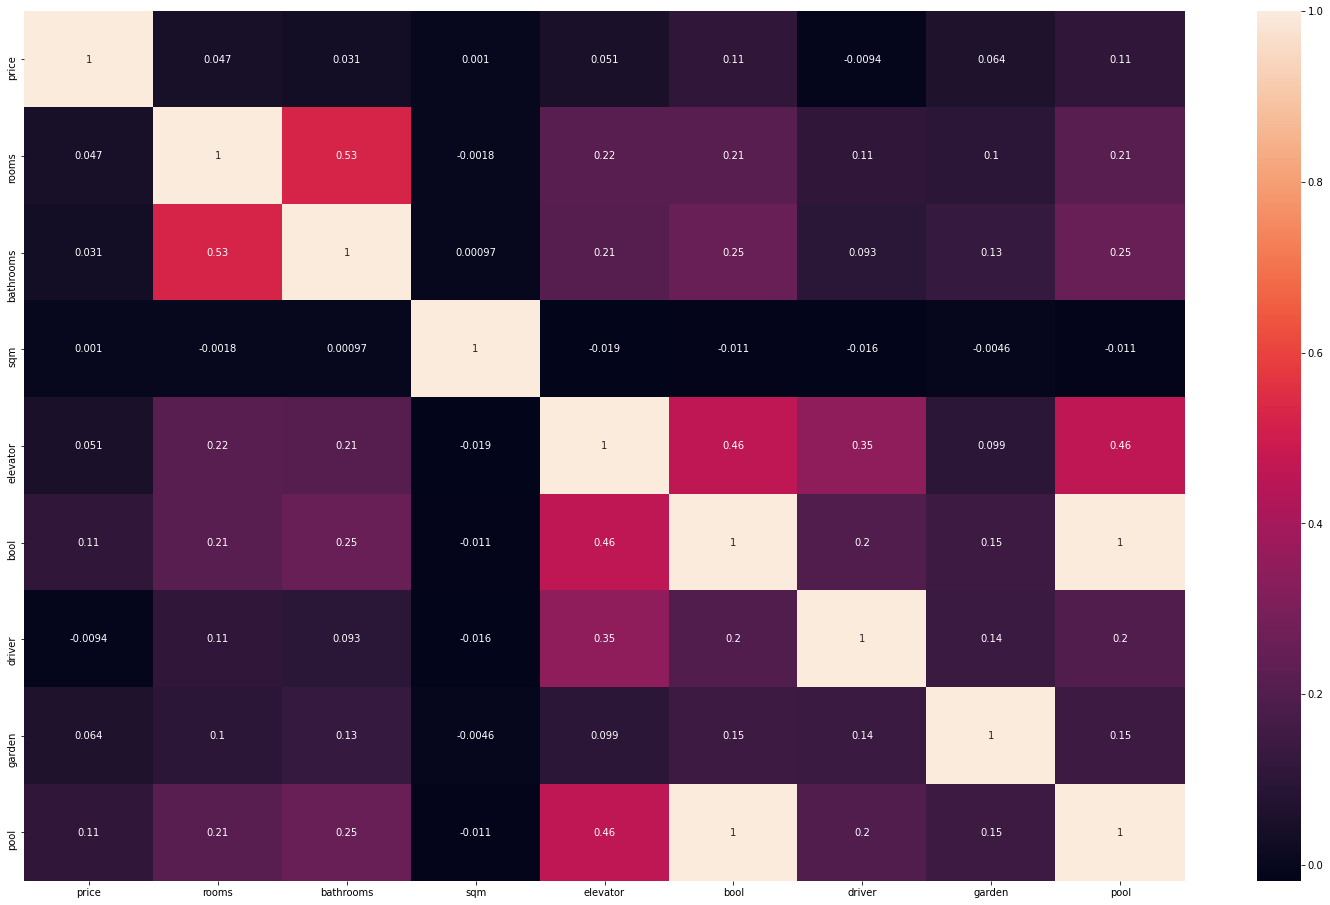

In [419]:
plt.figure(figsize=(26,16))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

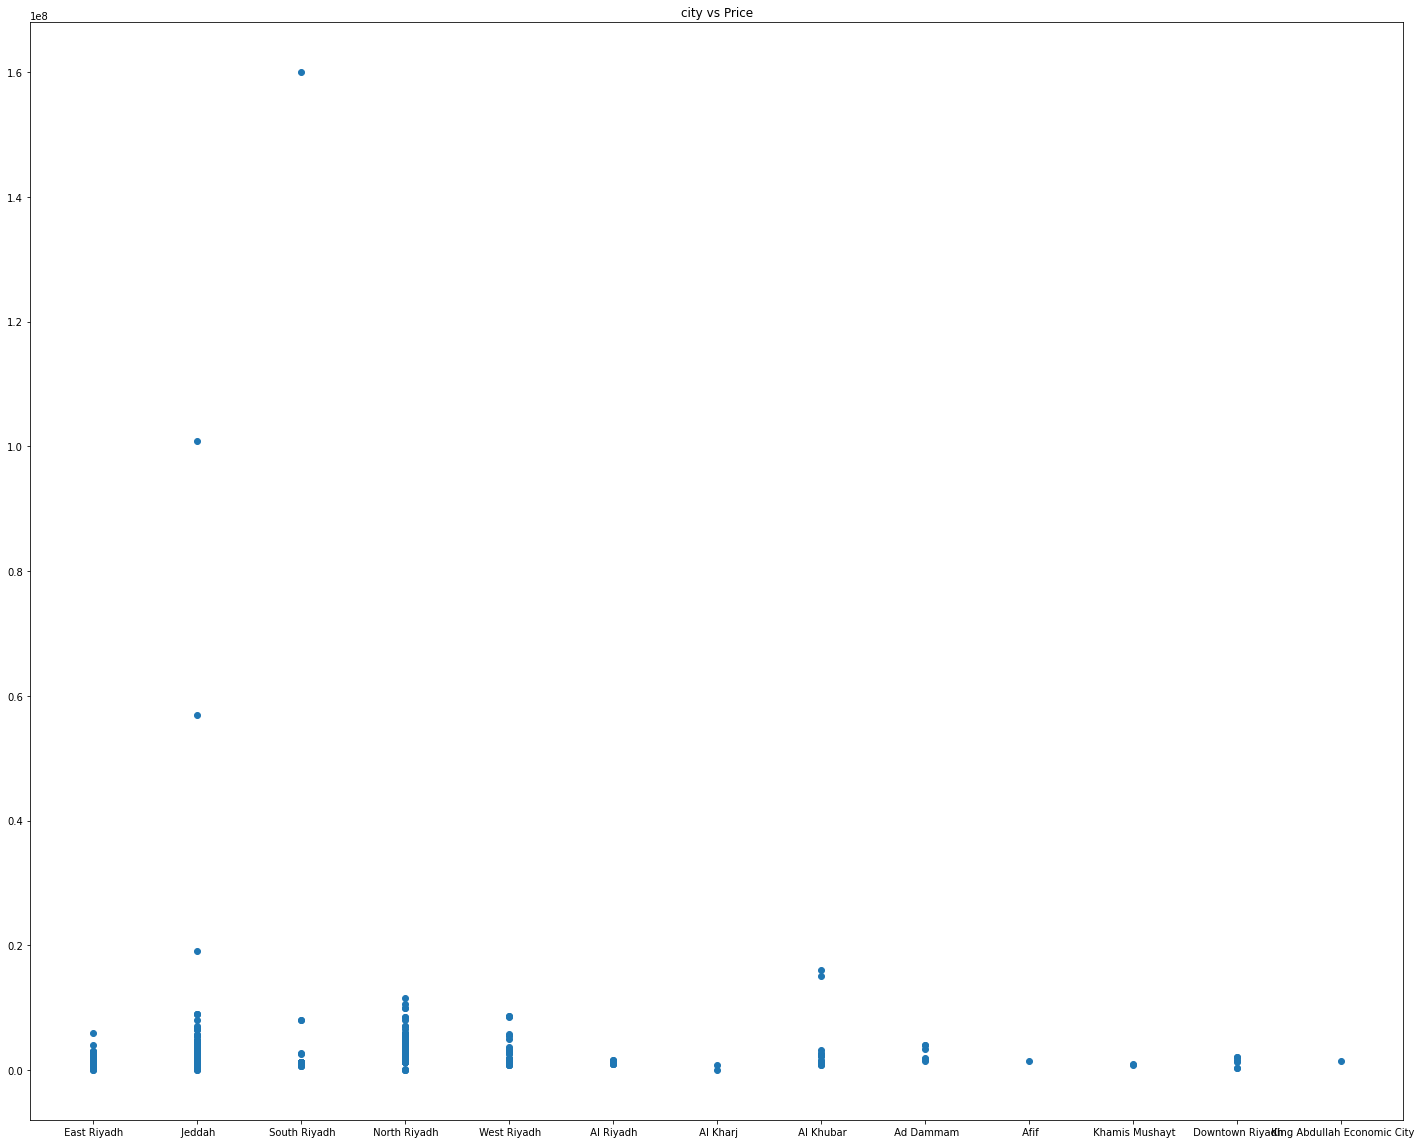

In [424]:
plt.figure(figsize=(20,16))
plt.scatter(df_train['city'],df_train['price'])
plt.title('city vs Price')
plt.tight_layout()

In [425]:
df_train['administritive_area'].unique()

array([' Ar Riyadh', ' Makkah Al Mukarramah', ' Eastern', ' Asir'],
      dtype=object)

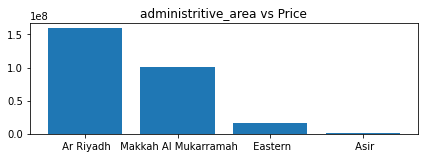

In [444]:
plt.subplot(212)
plt.bar(df_train['administritive_area'],df_train['price'])
plt.title('administritive_area vs Price')
plt.tight_layout()

Text(0.5, 0, 'Freq')

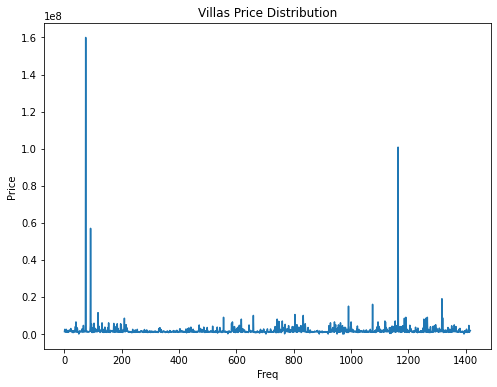

In [445]:
fig,ax = plt.subplots(figsize=(8,6))
plt.plot(df_train['price'])
plt.title('Villas Price Distribution')
plt.ylabel('Price')
plt.xlabel('Freq')

<AxesSubplot:xlabel='rooms'>

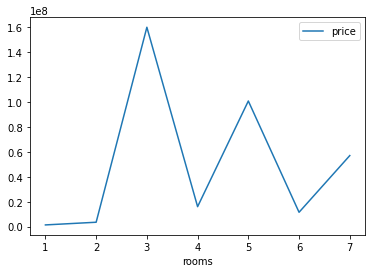

In [464]:
room= df_train.groupby('rooms')[['price']].max()
room.plot()

**from these simple plots we can relationships between features**

## Test data part

## Automated crawling using Selenium - Test data

In [145]:
driver = webdriver.Chrome(executable_path='./chromedriver')
for i in range(60,100):
    neighborhood_name=[]
    price =[]
    city=[]
    rooms=[]
    bathrooms=[]
    sqm=[]
    administritive_area=[]
    ref=[]
    driver.get("https://www.propertyfinder.sa/en/buy/villas-for-sale.html?page={}".format(i))

    sleep(5) 
    
    html = driver.page_source 
    
    soup1= BeautifulSoup(html, 'html.parser')
    items= soup1.find_all('div', attrs={'class':'card-list card-list--property'})
    
    
#     -------------- 
    for item in items:
        for lis in item:
            for j in range(len(lis.find_all('span',class_='card__price-value'))):
                price.append(float(lis.find_all('span',class_='card__price-value')[j].text.split()[0].replace(',', '')))
                neighborhood_name.append(lis.find_all('span', class_="card__location-text")[j].text.split(',')[0])
                city.append(lis.find_all('span', class_="card__location-text")[j].text.split(',')[1])


                try:
                    administritive_area.append(lis.find_all('span', class_="card__location-text")[j].text.split(',')[2])
                except:
                    administritive_area.append("null")

                try:
                    rooms.append(lis.find_all('p', class_="card__property-amenity card__property-amenity--bedrooms")[j].text)
                except:
                    rooms.append("null")
                    
                    
                try:
                    bathrooms.append(lis.find_all('p',class_="card__property-amenity--bathrooms")[j].text)
                except:
                    bathrooms.append("null")
                    
                    
                try:
                    sqm.append(lis.find_all('p',class_="card__property-amenity card__property-amenity--area")[j].text.split()[0])
                except:
                    sqm.append("null")
                try:  
                    ref.append(lis.find('a',class_='card card--clickable')['href'])
                except:
                    ref.append("null")
                

    df = pd.DataFrame({'price':price,
                       'neighborhood_name':neighborhood_name,
                       'administritive_area':administritive_area,
                       'city':city,
                       'rooms':rooms,
                       'bathrooms':bathrooms,
                       'sqm':sqm,
                       'ref':ref
                      })

     #Write each page
    df.to_csv('./data/page_test{}.csv'.format(i), index=False)

    #Write all of the pages
    df.to_csv('./data/all_test.csv', mode='a' ,index=False, header=False)   
    
    print(f'Page {i} Finished!')

Page 60 Finished!
Page 61 Finished!
Page 62 Finished!
Page 63 Finished!
Page 64 Finished!
Page 65 Finished!
Page 66 Finished!
Page 67 Finished!
Page 68 Finished!
Page 69 Finished!
Page 70 Finished!
Page 71 Finished!
Page 72 Finished!
Page 73 Finished!
Page 74 Finished!
Page 75 Finished!
Page 76 Finished!
Page 77 Finished!
Page 78 Finished!
Page 79 Finished!
Page 80 Finished!
Page 81 Finished!
Page 82 Finished!
Page 83 Finished!
Page 84 Finished!
Page 85 Finished!
Page 86 Finished!
Page 87 Finished!
Page 88 Finished!
Page 89 Finished!
Page 90 Finished!
Page 91 Finished!
Page 92 Finished!
Page 93 Finished!
Page 94 Finished!
Page 95 Finished!
Page 96 Finished!
Page 97 Finished!
Page 98 Finished!
Page 99 Finished!


In [146]:
#read data after scrapping main Features
df1=pd.read_csv('./data/all_test.csv')
df1.shape

(1000, 8)

In [147]:
df1.head()

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,ref
0,1250000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312,https://www.propertyfinder.sa/en/buy/villa-for...
1,1350000.0,Al Manarat,Makkah Al Mukarramah,Jeddah,6,5,275,https://www.propertyfinder.sa/en/buy/villa-for...
2,1400000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,7,6,350,https://www.propertyfinder.sa/en/buy/villa-for...
3,850000.0,Al Wahah,Makkah Al Mukarramah,Jeddah,5,3,135,https://www.propertyfinder.sa/en/buy/villa-for...
4,1050000.0,Tuwaiq,Ar Riyadh,West Riyadh,4,7,250,https://www.propertyfinder.sa/en/buy/villa-for...


**Adding more features help to predict villas prices**

In [148]:
# Get Description for each villa
driver = webdriver.Chrome(executable_path='./chromedriver')
des=[]

for ref in df1.ref:

    driver.get(ref)
    
    html = driver.page_source 
    
    soup2= BeautifulSoup(html, 'html.parser')
        
    for description in soup2.find_all('div',class_='text-trim property-description__text-trim'):
        try:
            des.append(description.text.replace('*', ' ').replace('\n',' ').replace('-',' ').replace(':',' ').replace('و',''))
        except:
            des.append('null')
            
    print(f'Page {len(des)} Finished!')



Page 1 Finished!
Page 2 Finished!
Page 3 Finished!
Page 4 Finished!
Page 5 Finished!
Page 6 Finished!
Page 7 Finished!
Page 8 Finished!
Page 9 Finished!
Page 10 Finished!
Page 11 Finished!
Page 12 Finished!
Page 13 Finished!
Page 14 Finished!
Page 15 Finished!
Page 16 Finished!
Page 17 Finished!
Page 18 Finished!
Page 19 Finished!
Page 20 Finished!
Page 21 Finished!
Page 22 Finished!
Page 23 Finished!
Page 24 Finished!
Page 25 Finished!
Page 26 Finished!
Page 27 Finished!
Page 28 Finished!
Page 29 Finished!
Page 30 Finished!
Page 31 Finished!
Page 32 Finished!
Page 33 Finished!
Page 34 Finished!
Page 35 Finished!
Page 36 Finished!
Page 37 Finished!
Page 38 Finished!
Page 39 Finished!
Page 40 Finished!
Page 41 Finished!
Page 42 Finished!
Page 43 Finished!
Page 44 Finished!
Page 45 Finished!
Page 46 Finished!
Page 47 Finished!
Page 48 Finished!
Page 49 Finished!
Page 50 Finished!
Page 51 Finished!
Page 52 Finished!
Page 53 Finished!
Page 54 Finished!
Page 55 Finished!
Page 56 Finished!
P

Page 438 Finished!
Page 439 Finished!
Page 440 Finished!
Page 441 Finished!
Page 442 Finished!
Page 443 Finished!
Page 444 Finished!
Page 445 Finished!
Page 446 Finished!
Page 447 Finished!
Page 448 Finished!
Page 449 Finished!
Page 450 Finished!
Page 451 Finished!
Page 452 Finished!
Page 453 Finished!
Page 454 Finished!
Page 455 Finished!
Page 456 Finished!
Page 457 Finished!
Page 458 Finished!
Page 459 Finished!
Page 460 Finished!
Page 461 Finished!
Page 462 Finished!
Page 463 Finished!
Page 464 Finished!
Page 465 Finished!
Page 466 Finished!
Page 467 Finished!
Page 468 Finished!
Page 469 Finished!
Page 470 Finished!
Page 471 Finished!
Page 472 Finished!
Page 473 Finished!
Page 474 Finished!
Page 475 Finished!
Page 476 Finished!
Page 477 Finished!
Page 478 Finished!
Page 479 Finished!
Page 480 Finished!
Page 481 Finished!
Page 482 Finished!
Page 483 Finished!
Page 484 Finished!
Page 485 Finished!
Page 486 Finished!
Page 487 Finished!
Page 488 Finished!
Page 489 Finished!
Page 490 Fin

Page 870 Finished!
Page 871 Finished!
Page 872 Finished!
Page 873 Finished!
Page 874 Finished!
Page 875 Finished!
Page 876 Finished!
Page 877 Finished!
Page 878 Finished!
Page 879 Finished!
Page 880 Finished!
Page 881 Finished!
Page 882 Finished!
Page 883 Finished!
Page 884 Finished!
Page 885 Finished!
Page 886 Finished!
Page 887 Finished!
Page 888 Finished!
Page 889 Finished!
Page 890 Finished!
Page 891 Finished!
Page 892 Finished!
Page 893 Finished!
Page 894 Finished!
Page 895 Finished!
Page 896 Finished!
Page 897 Finished!
Page 898 Finished!
Page 899 Finished!
Page 900 Finished!
Page 901 Finished!
Page 902 Finished!
Page 903 Finished!
Page 904 Finished!
Page 905 Finished!
Page 906 Finished!
Page 907 Finished!
Page 908 Finished!
Page 909 Finished!
Page 910 Finished!
Page 911 Finished!
Page 912 Finished!
Page 913 Finished!
Page 914 Finished!
Page 915 Finished!
Page 916 Finished!
Page 917 Finished!
Page 918 Finished!
Page 919 Finished!
Page 920 Finished!
Page 921 Finished!
Page 922 Fin

In [310]:
#check lengeth of description list
len(des)

1000

In [311]:
df1['description'] = des #append Description to dataframe

In [312]:
df_test=df1

In [313]:
df_test.head()

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,ref,description
0,1250000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا للبيع مدرين درج داخلي منفصل مساحه الارضي...
1,1350000.0,Al Manarat,Makkah Al Mukarramah,Jeddah,6,5,275,https://www.propertyfinder.sa/en/buy/villa-for...,للبيع فيلا فاخرة مساحة 275 م تشطيب فاخر شا...
2,1400000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,7,6,350,https://www.propertyfinder.sa/en/buy/villa-for...,بسم الله الرحمن الرحيم فيلا للبيع ابحر الشمال...
3,850000.0,Al Wahah,Makkah Al Mukarramah,Jeddah,5,3,135,https://www.propertyfinder.sa/en/buy/villa-for...,رف للبيع في الاحه ٥ غرف ...
4,1050000.0,Tuwaiq,Ar Riyadh,West Riyadh,4,7,250,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا دبلكس درج صاله داخلي شقه منفصله مساحه ٢٥...


In [314]:
#save new dataframe to csv file
df1.to_csv('./data/data_test_describtion.csv',index=False)

In [315]:
#read csv file 
df_desc_t=pd.read_csv('./data/data_test_describtion.csv')

In [319]:
df_desc_t

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,ref,description
0,1250000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا للبيع مدرين درج داخلي منفصل مساحه الارضي...
1,1350000.0,Al Manarat,Makkah Al Mukarramah,Jeddah,6,5,275,https://www.propertyfinder.sa/en/buy/villa-for...,للبيع فيلا فاخرة مساحة 275 م تشطيب فاخر شا...
2,1400000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,7,6,350,https://www.propertyfinder.sa/en/buy/villa-for...,بسم الله الرحمن الرحيم فيلا للبيع ابحر الشمال...
3,850000.0,Al Wahah,Makkah Al Mukarramah,Jeddah,5,3,135,https://www.propertyfinder.sa/en/buy/villa-for...,رف للبيع في الاحه ٥ غرف ...
4,1050000.0,Tuwaiq,Ar Riyadh,West Riyadh,4,7,250,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا دبلكس درج صاله داخلي شقه منفصله مساحه ٢٥...
...,...,...,...,...,...,...,...,...,...
995,1120000.0,Ar Rimal,Ar Riyadh,East Riyadh,4,5,240,https://www.propertyfinder.sa/en/buy/villa-for...,للبيع فله درج داخلي شقه مدخل خاص شارع ٢٠ جنبي ...
996,1900000.0,An Narjis,Ar Riyadh,North Riyadh,5,7,312,https://www.propertyfinder.sa/en/buy/villa-for...,للبيع فيلا مدرن الحي النرجس المساحة 312 متر ...
997,820000.0,Badr,Ar Riyadh,South Riyadh,3,4,250,https://www.propertyfinder.sa/en/buy/villa-for...,للبيع فيلا درج داخلي دبلكس يتكن الدر الأل من ٣...
998,2100000.0,An Narjis,Ar Riyadh,North Riyadh,4,7,385,https://www.propertyfinder.sa/en/buy/villa-for...,للبيع فيلا مدرن الحي النرجس شمال طريق الملك...


In [320]:
df_desc_t.isna().sum()

price                   0
neighborhood_name       0
administritive_area     5
city                    0
rooms                   2
bathrooms              41
sqm                     0
ref                     0
description             2
dtype: int64

## Extract more features 

**Use CountVectorizer to maintain a count of how many times each token has been seen in each description .**

In [322]:
cv = CountVectorizer()
description_cv = cv.fit(df1['description'])

In [323]:
description_cv.vocabulary_

{'فيلا': 3821,
 'للبيع': 4096,
 'مدرين': 4437,
 'درج': 3110,
 'داخلي': 3072,
 'منفصل': 4774,
 'مساحه': 4488,
 'الارضي': 1179,
 '320م': 287,
 'مساحته': 4482,
 'المباني': 1962,
 '520تقريبا': 478,
 'الدر': 1479,
 'مجلس': 4389,
 'رجال': 3192,
 'مع': 4585,
 'مقلط': 4670,
 'درة': 3099,
 'مياه': 4789,
 'نساء': 4833,
 'صاله': 3486,
 'مطبخ': 4570,
 'يجد': 4923,
 'تأسيس': 2655,
 'مصعد': 4554,
 'مكان': 4671,
 'للمسبح': 4209,
 'الأل': 1098,
 '4غرف': 446,
 'بحماماتها': 2442,
 'سرفيس': 3289,
 'الملحق': 2145,
 'غرفه': 3733,
 'درتين': 3109,
 'غسيل': 3739,
 'حارس': 2928,
 'سطح': 3292,
 'السعر': 1586,
 'ملين': 4717,
 '250الف': 195,
 'ملاحظه': 4698,
 'المقع': 2129,
 'غير': 3747,
 'دقيق': 3127,
 'يرجع': 4938,
 'حجز': 2938,
 'معدللاستفسار': 4598,
 'display': 656,
 'phone': 693,
 'number': 686,
 'فاخرة': 3758,
 'مساحة': 4479,
 '275': 221,
 'تشطيب': 2740,
 'فاخر': 3757,
 'شارع': 3363,
 '30': 256,
 'بناء': 2608,
 'لبشه': 3989,
 'كامله': 3898,
 'على': 3675,
 'الارض': 1175,
 'مسبح': 4496,
 'تاسيس': 2661,
 'الثا

In [324]:
description_cv.get_feature_names()

['00',
 '000',
 '0000',
 '000الف',
 '000ثلاثمائة',
 '000ريال',
 '000ملينان',
 '020',
 '050',
 '0551303641',
 '0569026554',
 '0569026554______________________________________________________________________________',
 '10',
 '100',
 '1000',
 '1000000',
 '1000م',
 '100امبير',
 '1042',
 '1056م',
 '108',
 '10م',
 '11',
 '110',
 '1100',
 '1100م',
 '11043',
 '11045',
 '11049',
 '11081',
 '11096',
 '11099',
 '11100',
 '11101',
 '11102',
 '11103',
 '11104',
 '11105',
 '11109',
 '11113',
 '11137',
 '11157',
 '112',
 '1145',
 '1147',
 '1150',
 '1150000',
 '116',
 '12',
 '120',
 '12000',
 '1200000الف',
 '1200م',
 '1250000',
 '12500الف',
 '1270000',
 '12م',
 '12متر',
 '13',
 '130000',
 '13000000',
 '130م2',
 '1330000',
 '13315',
 '1350',
 '14',
 '1400000',
 '1450',
 '1450000',
 '1460',
 '15',
 '150',
 '1500',
 '150000',
 '1500000',
 '150الف',
 '150م2',
 '1550000',
 '1560',
 '15جنب',
 '15جنبي15شرقي',
 '15شرق',
 '15شماليه',
 '15م',
 '15م15م10م',
 '15متر',
 '16',
 '160',
 '1600',
 '1600000',
 '165000

In [325]:
desc_t = description_cv.transform(df1['description'])

In [326]:
desc_t

<1000x5273 sparse matrix of type '<class 'numpy.int64'>'
	with 55029 stored elements in Compressed Sparse Row format>

In [327]:
desc_t.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [328]:
count_vect_df = pd.DataFrame(desc_t.todense(), columns=description_cv.get_feature_names())
count_vect_df.shape

(1000, 5273)

**One of the most used words in the description is  "مسبح, مصعد, حديقة and سائق," which means pool, elevator, garden and driver room, which means that it is the most influential features of villa prices, so I will add it to the data to help get right predict.**

In [331]:
df1['elevator'] = count_vect_df['مصعد']
df1['pool'] = count_vect_df['مسبح']
df1['driver'] = count_vect_df['سائق']
df1['garden'] = count_vect_df['حديقة']

In [333]:
df1.head()

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,ref,description,elevator,pool,driver,garden
0,1250000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا للبيع مدرين درج داخلي منفصل مساحه الارضي...,1,0,0,0
1,1350000.0,Al Manarat,Makkah Al Mukarramah,Jeddah,6,5,275,https://www.propertyfinder.sa/en/buy/villa-for...,للبيع فيلا فاخرة مساحة 275 م تشطيب فاخر شا...,1,1,0,0
2,1400000.0,Az Zomorod,Makkah Al Mukarramah,Jeddah,7,6,350,https://www.propertyfinder.sa/en/buy/villa-for...,بسم الله الرحمن الرحيم فيلا للبيع ابحر الشمال...,1,1,0,0
3,850000.0,Al Wahah,Makkah Al Mukarramah,Jeddah,5,3,135,https://www.propertyfinder.sa/en/buy/villa-for...,رف للبيع في الاحه ٥ غرف ...,0,0,1,0
4,1050000.0,Tuwaiq,Ar Riyadh,West Riyadh,4,7,250,https://www.propertyfinder.sa/en/buy/villa-for...,فيلا دبلكس درج صاله داخلي شقه منفصله مساحه ٢٥...,0,0,0,0


In [336]:
cols=['ref','description','price']
df_test=df1.drop(cols,axis=1)

In [337]:
df_test.shape

(1000, 10)

## Data Cleaning and EDA

In [338]:
df_test.head()

,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,pool,driver,garden
0,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312,1,0,0,0
1,Al Manarat,Makkah Al Mukarramah,Jeddah,6,5,275,1,1,0,0
2,Az Zomorod,Makkah Al Mukarramah,Jeddah,7,6,350,1,1,0,0
3,Al Wahah,Makkah Al Mukarramah,Jeddah,5,3,135,0,0,1,0
4,Tuwaiq,Ar Riyadh,West Riyadh,4,7,250,0,0,0,0


In [339]:
df_test.dtypes

neighborhood_name      object
administritive_area    object
city                   object
rooms                  object
bathrooms              object
sqm                    object
elevator                int64
pool                    int64
driver                  int64
garden                  int64
dtype: object

In [340]:
df_test.rooms.unique()

array(['6', '7', '5', '4', '7+', '3', '2', 'Studio', nan, '1'],
      dtype=object)

In [341]:
#drop null values
df_test_c=df_test.dropna(axis=0)

In [342]:
df_test_c.shape

(953, 10)

In [343]:
df_test_c['rooms']=df_test_c['rooms'].apply(lambda col:col.replace("+",""))
df_test_c['bathrooms']=df_test_c['bathrooms'].apply(lambda col:col.replace("+",""))


/Users/Maha48/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Maha48/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [344]:
df_test_c.bathrooms.unique()

array(['6', '5', '3', '7', '4', '1', '2'], dtype=object)

**remove Unassigned values**

In [345]:
unassigned_value= df_test_c[df_test_c['rooms'] == 'Studio']
unassigned_value

,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,pool,driver,garden
50,As Salhiyah,Makkah Al Mukarramah,Jeddah,Studio,6,330,0,0,0,0
53,As Salhiyah,Makkah Al Mukarramah,Jeddah,Studio,6,315,1,1,0,0
78,As Salhiyah,Makkah Al Mukarramah,Jeddah,Studio,3,435,0,0,0,0
267,As Salhiyah,Makkah Al Mukarramah,Jeddah,Studio,7,320,0,0,0,0
279,As Salhiyah,Makkah Al Mukarramah,Jeddah,Studio,5,450,0,0,0,0
435,Al Hamadaniyah,Makkah Al Mukarramah,Jeddah,Studio,7,430,0,0,0,0
436,As Salhiyah,Makkah Al Mukarramah,Jeddah,Studio,5,450,0,0,0,0
444,Ar Rahmanyah,Makkah Al Mukarramah,Jeddah,Studio,5,300,0,0,0,0
469,Al Bashaer,Makkah Al Mukarramah,Jeddah,Studio,6,450,0,0,0,0
521,Al Hamadaniyah,Makkah Al Mukarramah,Jeddah,Studio,7,430,0,0,0,0


In [346]:
df_test_c=df_test_c.drop(unassigned_value.index, axis=0)

In [347]:
df_test_c['rooms'].unique()

array(['6', '7', '5', '4', '3', '2', '1'], dtype=object)

In [348]:
df_test_c['sqm'].unique()

array(['312', '275', '350', '135', '250', '280', '300', '290', '370',
       '520', '480', '400', '440', '580', '360', '500', '660', '1,056',
       '1,530', '625', '320', '450', '750', '600', '525', '420', '220',
       '260', '437', '875', '540', '330', '288', '276', '405', '527',
       '200', '362', '615', '410', '976', '364', '800', '495', '1,800',
       '216', '630', '277', '336', '225', '274', '202', '240', '345',
       '325', '780', '313', '270', '700', '255', '372', '390', '441',
       '318', '380', '268', '237', '267', '340', '455', '317', '690',
       '334', '375', '1,750', '841', '964', '395', '262', '1,000', '505',
       '230', '333', '2,000', '1,008', '169', '775', '2,500', '669',
       '532', '367', '2,360', '315', '462', '368', '816', '287', '1,850',
       '560', '210', '273', '193', '424', '825', '407', '222', '236',
       '278', '285', '229', '1,350', '725', '950', '720', '640', '425',
       '365', '388', '782', '342', '356', '616', '1,445', '805', '308',
   

In [349]:
df_test_c.dtypes

neighborhood_name      object
administritive_area    object
city                   object
rooms                  object
bathrooms              object
sqm                    object
elevator                int64
pool                    int64
driver                  int64
garden                  int64
dtype: object

**change data type for rooms, bathrooms int and sqm  to float**

In [350]:
df_test_c['rooms']=df_test_c['rooms'].astype(int)
df_test_c['bathrooms']=df_test_c['bathrooms'].astype(int)

In [351]:
df_test_c['sqm']=df_test_c['sqm'].apply(lambda col:col.replace(",",""))

In [352]:
df_test_c['sqm']=df_test_c['sqm'].astype(float)

In [353]:
#check data type after change it
df_test_c.dtypes

neighborhood_name       object
administritive_area     object
city                    object
rooms                    int64
bathrooms                int64
sqm                    float64
elevator                 int64
pool                     int64
driver                   int64
garden                   int64
dtype: object

In [354]:
df_test_c.neighborhood_name.unique()

array(['Az Zomorod', 'Al Manarat', 'Al Wahah', 'Tuwaiq', 'Ar Rimal',
       'As Swaryee', 'Ash Sheraa', 'As Salhiyah', 'As Sahafah', 'Badr',
       'Al Ghoroub', 'Dirab', 'Al Yaqoot', 'Al Malqa', 'An Narjis',
       'Al Ajyal', 'Al Yasmin', 'Al Ulaya', 'An Nada', 'Al Manar',
       'Ilaishah', 'Al Hamadaniyah', 'Taibah', 'Al Arid',
       'Ad Dar Al Baida', 'Al Frosyah', 'As Safa', 'Hittin', 'Al Iskan',
       'Al Loaloa', 'Qurtubah', 'Al Aqiq', 'Al Qirawan', 'Al Munsiyah',
       'Al Hazm', 'Al Aziziyah', 'Al Qusour', 'Ar Rabwah', 'Al Badiah',
       'Ar Rahmanyah', 'Al Mahdiyah', 'Ash Shifa', 'Al Qadisiyah',
       'Ghirnatah', 'Al Fanar', 'Al Janadriyah', 'Abhur Ash Shamaliyah',
       'Dhahrat Namar', 'Uqaz', 'Al Marwah', 'Al Musa Subdivision',
       'Al Basatin', 'Al Buhirat', 'Al Amwaj', 'As Suwaidi',
       'King Abdullah', 'Al Faiha', 'Al Haeer', 'Al Wurud',
       'Dhahrat Al Badiah', 'Down Town', 'Al Mursalat', 'Al Buhayrah',
       'Al Hamra', 'Al Yarmuk', 'Al Izdihar', 'Ab

In [355]:
df_test_c.administritive_area.unique()

array([' Makkah Al Mukarramah', ' Ar Riyadh', ' Eastern', ' Asir'],
      dtype=object)

In [356]:
df_test_c.city.unique()

array([' Jeddah', ' West Riyadh', ' East Riyadh', ' North Riyadh',
       ' South Riyadh', ' Downtown Riyadh', ' Al Khubar',
       ' Khamis Mushayt', ' Abha', ' Ad Dammam', ' Ad Diriyah',
       ' Al Ghat'], dtype=object)

In [357]:
df_test_c.to_csv('./data/test_data.csv',index=False)

In [358]:
df_test=pd.read_csv('./data/test_data.csv')

In [359]:
df_test.head()

,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,pool,driver,garden
0,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312.0,1,0,0,0
1,Al Manarat,Makkah Al Mukarramah,Jeddah,6,5,275.0,1,1,0,0
2,Az Zomorod,Makkah Al Mukarramah,Jeddah,7,6,350.0,1,1,0,0
3,Al Wahah,Makkah Al Mukarramah,Jeddah,5,3,135.0,0,0,1,0
4,Tuwaiq,Ar Riyadh,West Riyadh,4,7,250.0,0,0,0,0


In [ ]:
#Visualization

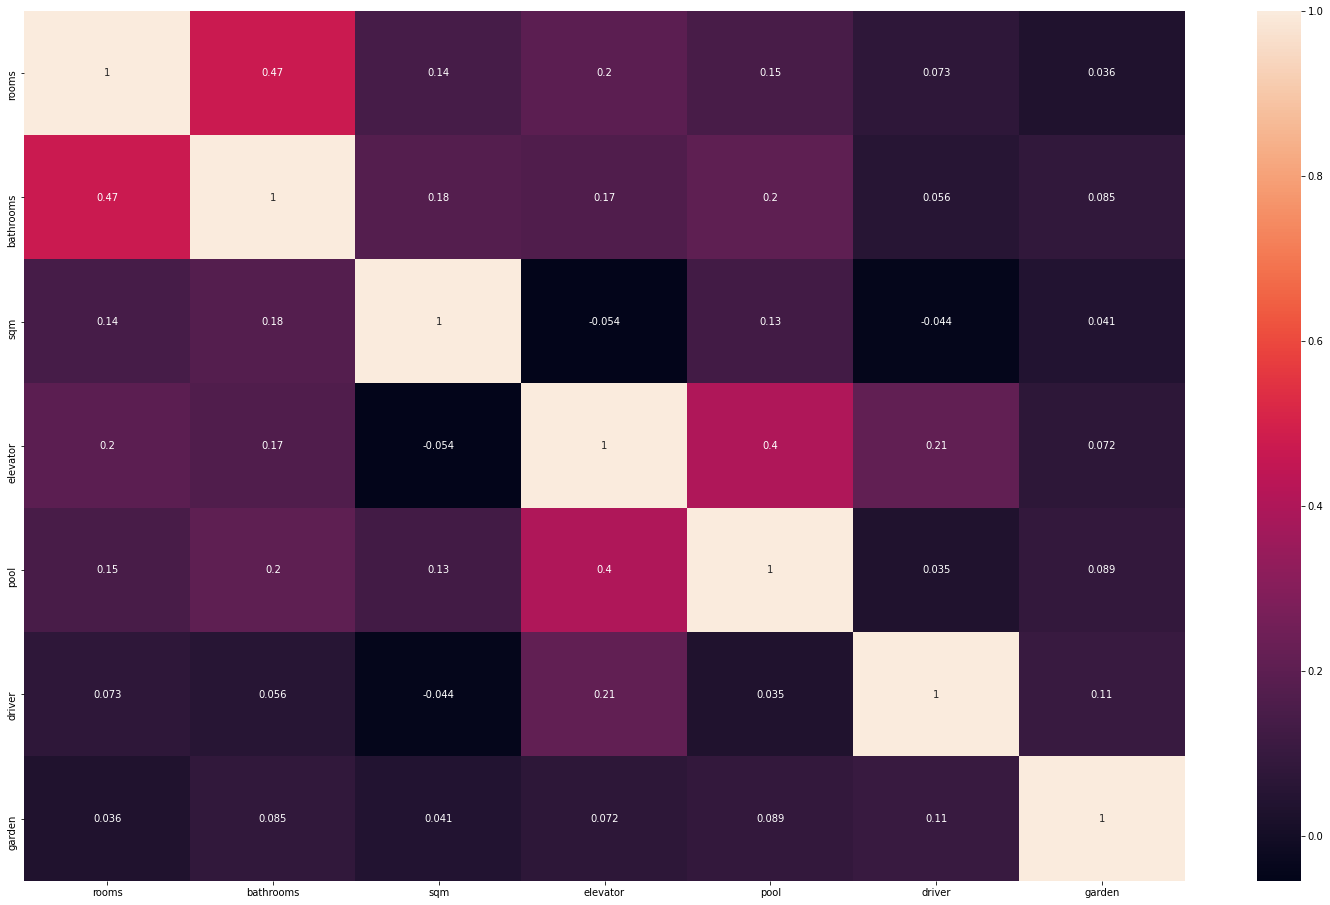

In [360]:
plt.figure(figsize=(26,16))
sns.heatmap(df_test.corr(), annot=True)
plt.show()